In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.io
import sklearn.datasets
from reg_utils import sigmoid,relu,plot_decision_boundary,initialize_parameters,load_2D_dataset,predict_dec
from reg_utils import compute_cost,predict,forward_propagation,backward_propagation,update_parameters
from testCases import *


plt.rcParams['figure.figsize']=(7.0,4.0) #set default size of plots
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

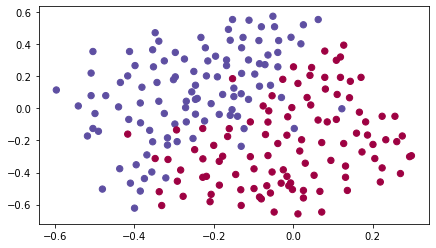

In [2]:
train_X,train_Y,test_X,test_Y=load_2D_dataset()

In [22]:
def model(X,Y,learning_rate=0.3,num_iterations=30000,print_cost=True,lambd=0,keep_prob=1):
    'LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.'
    
    grads= {}
    costs= []
    m=X.shape[1]
    layer_dims=[X.shape[0],20,3,1]
    
    parameters=initialize_parameters(layer_dims)
    
    
    for i in range(0,num_iterations):
        if keep_prob==1:
            a3,cache=forward_propagation(X,parameters)
        elif keep_prob<1:  #dropout shutdown
            a3,cache=forward_propagation_with_dropout(X,parameters,keep_prob)
            
        #compute cost
    
        if lambd==0:
            cost=compute_cost(a3,Y)
        else:
            cost=compute_cost_with_regularization(a3,Y,parameters,lambd)
            
        
        if lambd==0 and keep_prob==1:
            grads=backward_propagation(X,Y,cache)
        
        elif lambd!=0:
            grads=backward_propagation_with_regularization(X,Y,cache,lambd)
        elif keep_prob<1:
            grads=backward_propagation_with_dropout(X,Y,cache,keep_prob)
            
        parameters=update_parameters(parameters,grads,learning_rate)
    
        if print_cost and i % 10000 == 0:
            print('cost after iteration {}:{}'.format(i,cost))
        
        if print_cost and i % 1000 == 0:
            costs.append(cost)
        
#plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations(x1,000)')
    plt.title('Learning rate='+str(learning_rate))
    plt.show()
    
    return parameters

cost after iteration 0:0.6557412523481002
cost after iteration 10000:0.16329987525724218
cost after iteration 20000:0.1385164242324048


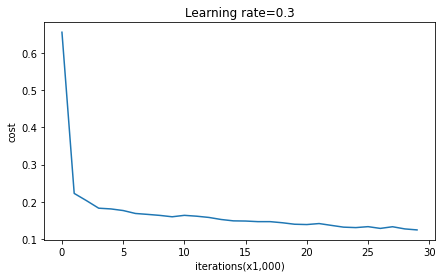

on the training set:
Accuracy: 0.9478672985781991
on the testing set:
Accuracy: 0.915


In [23]:
parameters=model(train_X,train_Y)
print('on the training set:')
predict_train=predict(train_X,train_Y,parameters)
print('on the testing set:')
predictions_test=predict(test_X,test_Y,parameters)

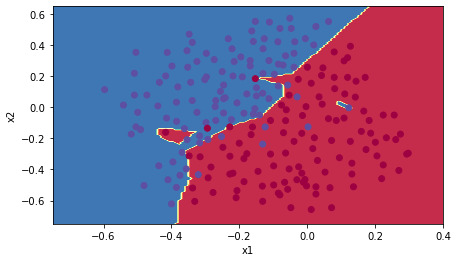

In [27]:
axes=plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x:predict_dec(parameters,x.T),train_X,train_Y)

In [28]:
## we can see there is overfitting ...there will be pbm when new test data examine